In [160]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset
df = pd.read_excel("Cereals1.xls")
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [161]:
# To check if there are any null values
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [162]:
df1 = df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]]
df1
#

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,3,5,15,2.0,8.0,8,135,0
1,4,1,260,9.0,7.0,5,320,25
2,4,0,140,14.0,8.0,0,330,25
3,2,2,200,1.0,14.0,8,-1,25
4,2,2,180,1.5,10.5,10,70,25
...,...,...,...,...,...,...,...,...
71,2,1,250,0.0,21.0,3,60,25
72,1,1,140,0.0,13.0,12,25,25
73,3,1,230,3.0,17.0,3,115,25
74,3,1,200,3.0,17.0,3,110,25


### 1) Create a table with the 5-number summary of all the numeric attributes.


In [163]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.723684,6.934211,93.657895,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,4.160444,4.473136,68.502565,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


### 2) For each of the numeric attributes (proteins upto vitamins) , identify and replace all missing data(indicated with -1) with the arithmetic mean of the attribute.

In [164]:
df1[df.values == -1]

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
3,2,2,200,1.0,14.0,8,-1,25
19,3,0,80,1.0,21.0,0,-1,0
56,5,2,0,2.7,-1.0,-1,110,0
56,5,2,0,2.7,-1.0,-1,110,0


In [165]:
#df["carbo"].replace({-1 : df["carbo"].mean()},inplace = True)
#df["sugars"].replace({-1 : df["sugars"].mean()},inplace = True)
#df["potass"].replace({-1 : df["potass"].mean()},inplace = True)

#  or

for i in df1.columns:
    mean = df[i].mean()
    df[i].replace(to_replace = -1, value = mean, inplace = True)
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,93.657895,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


#### Hence, there are no more missing values that are replaced with -1 and the changes have been directly applied to the intial dataframe df.

In [166]:
# Now there are no missing values(that are replaced with -1) in the dataframe df
# To check,
df[df.values == -1]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating


Inserting 'inplace = True' in the replace function is mandatory to make the changes in the original dataset.

### 3) Create a table with the 5-number summary of all the numeric attributes after treating  missing values. Do you think the strategy used in dealing with missing values was  effective?

In [167]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.930575,7.038608,96.148892,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,3.737575,4.377048,66.688658,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.861842,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


Yes, I think this strategy used to treat the missing values was effective as the missing values in a particular attribute have been replaced with the arithmetic mean of that attribute.

### 4) For each of the numeric attributes (proteins upto vitamins), identify and replace all  noisy data with the median of attribute. 

<AxesSubplot:>

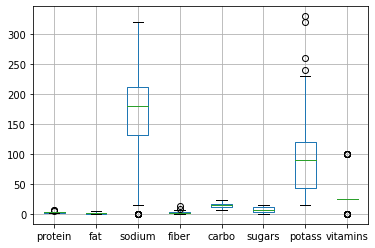

In [168]:
df2 = df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].copy()
df2.boxplot()

In [169]:
# let s be the summary of descriptive statistics of the dataframe df2.
s = df2.describe()
s

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2.526316,1.013158,160.065789,2.048684,14.930575,7.038608,96.148892,28.289474
std,1.089020,1.013159,84.318813,2.219038,3.737575,4.377048,66.688658,22.487813
min,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000
25%,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000
50%,2.500000,1.000000,180.000000,1.750000,14.861842,7.000000,90.000000,25.000000
75%,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000
max,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000


In the above boxplot,  we can clearly see the outliers in the numeric attributes, so we need to remove them.
In order to find the outliers, we need to find the Lower and upper bounds of the attributes or the z-score of that attributes.

In [170]:
for i in df2.columns:

    IQR = s[i]["75%"] - s[i]["25%"]
    LowerBound = s[i]["25%"] - (1.5 * IQR)
    UpperBound = s[i]["75%"] + (1.5 * IQR)
    median = df2[i].median()
    df[i] = df[i].mask(df[i] < LowerBound, median) 
    df[i] = df[i].mask(df[i] > UpperBound, median)

   # df.loc[(df[i] < LowerBound) | (df[i] > UpperBound), i] = median

<AxesSubplot:>

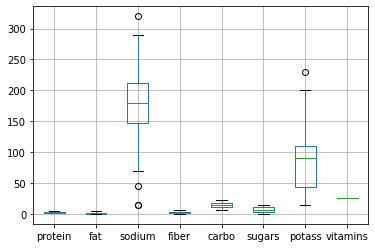

In [171]:
df2 = df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]]
df2.boxplot()

### 5) Create a table with the 5-number summary of all the numeric attributes after treating  noisy values. Do you think the strategy used in dealing with noisy values was effective?

In [172]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.401316,1.013158,181.381579,1.792105,14.930575,7.038608,85.754155,25.0,2.197368,1.030000,0.827500,42.327057
std,19.139378,0.875670,1.013159,60.186370,1.520220,3.737575,4.377048,48.049515,0.0,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,15.000000,0.000000,7.000000,0.000000,15.000000,25.0,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,147.500000,0.750000,12.000000,3.000000,43.750000,25.0,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.250000,1.000000,180.000000,1.625000,14.861842,7.000000,90.000000,25.0,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,110.000000,25.0,3.000000,1.000000,1.000000,50.780847
max,160.000000,4.000000,5.000000,320.000000,6.000000,23.000000,15.000000,230.000000,25.0,3.000000,1.500000,1.500000,93.704912


Yes, I think this strategy of dealing with the noisy data is effective to an extent because there are still a few outliers in the data.

## Use the prepared or preprocessed data to answer the following:

In [173]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3.0,5,15,2.00,8.0,8.0,135.000000,25,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4.0,1,260,1.75,7.0,5.0,90.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4.0,0,140,1.75,8.0,0.0,90.000000,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2.0,2,200,1.00,14.0,8.0,93.657895,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2.0,2,180,1.50,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541


### 6) Cross tabulate the type of cereal (hot vs cold) against the manufacturer

In [174]:
pd.crosstab(df["mfr"],df["type"])

type,C,H
mfr,,
A,0,1
G,22,0
K,23,0
N,4,1
P,9,0
Q,7,1
R,8,0


### 7) Which is the cereal with the best rating, worst rating?

In [175]:
df[df["rating"] == df["rating"].max()]["name"]

2    All-Bran_with_Extra_Fiber
Name: name, dtype: object

Cereal with best rating is  All-Bran_with_Extra_Fiber

In [176]:
df[df["rating"] == df["rating"].min()]["name"]

9    Cap'n'Crunch
Name: name, dtype: object

Cereal with worst rating is  Cap'n'Crunch

### 8) Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals. 

<AxesSubplot:title={'center':'rating'}, xlabel='[type]'>

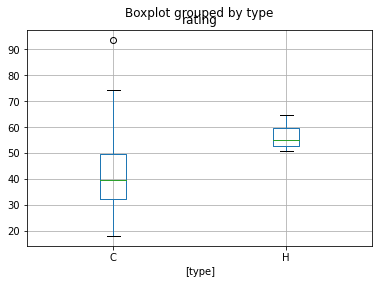

In [177]:
# let HR be the dataframe consisting the rating of hot cereals
# and CR be the dataframe consisting the rating of cold cereals.

HR= df[df["type"] == "H"]["rating"]
CR= df[df["type"] == "C"]["rating"]

df.boxplot(column=["rating"], by=["type"])
#sns.boxplot(data = [HR,CR])

### 9) Is there a relation between sugars, calories, carbs, and fat?


,sugars,calories,carbo,fat
sugars,1.000000,0.574304,-0.501056,0.300349
calories,0.574304,1.000000,0.207615,0.510630
carbo,-0.501056,0.207615,1.000000,-0.312341
fat,0.300349,0.510630,-0.312341,1.000000


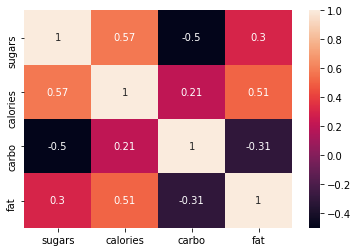

In [178]:
df3 = df[['sugars', 'calories', 'carbo', 'fat']]
corr1=df3.corr(method='pearson')
sns.heatmap(corr1, annot = True)
corr1

There is positive correlation between calories and sugars with correlation coefficient value of 0.57

There is positive correlation between calories and fat with correlation coefficient value of 0.51 

There is negative correlation between carbo and sugars with correlation coefficient value of -0.5

### Finally, there is no proper association or any significant relation between any of these variables.

### 10) Which manufacturers produce cereal with highest calories?

In [179]:
#df[["mfr","calories"]].sort_values(by = "calories",ascending = False).head(10)
a =df.groupby("mfr")["calories"].sum()
pd.DataFrame(a.sort_values(ascending = False))

,calories
mfr,
K,2500
G,2450
P,980
R,920
Q,760
N,450
A,100



"K" manufacturer produce cereal with highest calories

### 11) Use correlation tests and visualization to identify if the two variables calories and consumer rating associated ?

,calories,rating
calories,1.000000,-0.674336
rating,-0.674336,1.000000


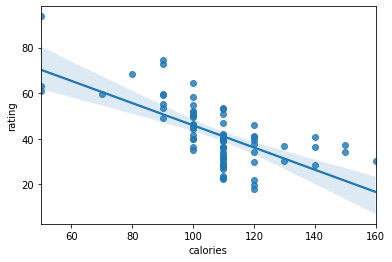

In [180]:
corr2 = df[["calories","rating"]].corr(method = "pearson")
sns.regplot(x="calories",y="rating",data = df)
corr2

The above correlation indicates that there is no proper association between the two variables calories and consumer rating as there is negative correlation between them.

### 12) Use correlation tests and visualization to identify if the two variables shelf and consumer rating associated?

<AxesSubplot:>

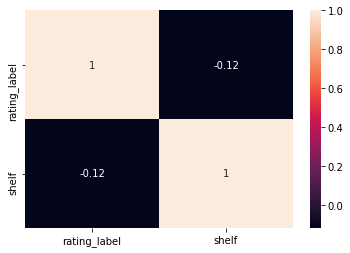

In [181]:
df['rating_label']=pd.factorize(df['rating'])[0]
a=df[['rating_label','shelf']]
sns.heatmap(a.corr(method='pearson'), annot = True)

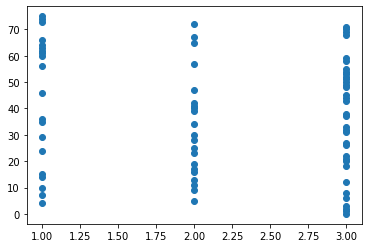

In [185]:
plt.scatter(df["shelf"],df["rating_label"])

Customer rating doesn't depend on the variable shelf and also there is no proper correlation between both of them.

### 13) Is there a relation between manufacturer and rating?

In [186]:
#Making 'rating' a categoric variable by binning
df['rating_cat']= pd.qcut(df['rating'], q=5,labels = ["Poor","Bad", "Average", "Good","Excelent"], duplicates = 'drop')
b = pd.crosstab(df['mfr'], df['rating_cat'])
b

rating_cat,Poor,Bad,Average,Good,Excelent
mfr,,,,,
A,0,0,0,0,1
G,10,3,6,3,0
K,2,7,6,3,5
N,0,0,0,0,5
P,2,1,2,2,2
Q,2,1,0,3,2
R,0,3,1,4,0


In [187]:
stat2, p2, dof2, expected2 = stats.chi2_contingency(b)
print(stat2)
print(p2)

52.60581540038063
0.0006518627671722501


As the P-square value is 0.05, we can say that there is strong relation between both the variables manufacturer and consumer rating 

### 14) Which nutrients are essential for a good rating for a cereal?

In [188]:
df4 = df[["calories", "protein","fat","sodium","fiber","carbo","sugars","potass","vitamins","rating"]].corr()
pd.DataFrame(df4["rating"].sort_values(ascending = False))

,rating
rating,1.000000
protein,0.466606
fiber,0.335319
potass,0.209746
carbo,0.160481
sodium,-0.050622
fat,-0.418439
calories,-0.674336
sugars,-0.774390
vitamins,NaN


From the above correlation table, we can see that protein, fiber, potass and carbo are positively correlated to rating indicating they are essential nutrients for good rating of a cereal.

And the top 3 nutrients which can be used to predict the rating of a cereal are protein, fiber and potass.

### 15) Design a Linear regression model to predict the rating of a cereal based on top 3 related nutrients. Tabulate the accuracy of the model using a 80 ,20 split

In [193]:
# Importing the linear_model and test_train_split modules from the scikit
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [194]:
# We are considering the below variables because they show high correlation with rating indicating that the rating would change
# by changing these variables.

X = df[["protein","sugars","calories"]]
y = df["rating"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
li_reg = linear_model.LinearRegression()
li_reg.fit(X_train,y_train)
predictions = li_reg.predict(X_test)
predictions
li_reg.score(X,y)

0.8215642599330923

### Accuracy : 82%